In [1]:
import pandas as pd

In [2]:
# information taken from : https://ourworldindata.org/covid-vaccinations
df = pd.read_csv('cv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          3196 non-null   object 
 1   Code                            2916 non-null   object 
 2   Date                            3196 non-null   object 
 3   total_vaccinations_per_hundred  3196 non-null   float64
dtypes: float64(1), object(3)
memory usage: 100.0+ KB


In [4]:
df.head()

,Entity,Code,Date,total_vaccinations_per_hundred
0,Albania,ALB,2021-01-10,0.00
1,Albania,ALB,2021-01-12,0.00
2,Albania,ALB,2021-01-13,0.01
3,Albania,ALB,2021-01-14,0.01
4,Albania,ALB,2021-01-15,0.01


In [5]:
# i want only the latest data 
df['Date'].max()

'2021-03-01'

In [6]:
df = df.rename(columns={"total_vaccinations_per_hundred": "% vaccinated"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        3196 non-null   object 
 1   Code          2916 non-null   object 
 2   Date          3196 non-null   object 
 3   % vaccinated  3196 non-null   float64
dtypes: float64(1), object(3)
memory usage: 100.0+ KB


In [8]:
df1 = df[df['Date'] == df['Date'].max()]

In [9]:
df1.count()

Entity          41
Code            40
Date            41
% vaccinated    41
dtype: int64

In [10]:
df1[df1['Code'] == 'USA']

,Entity,Code,Date,% vaccinated
3054,United States,USA,2021-03-01,22.99


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

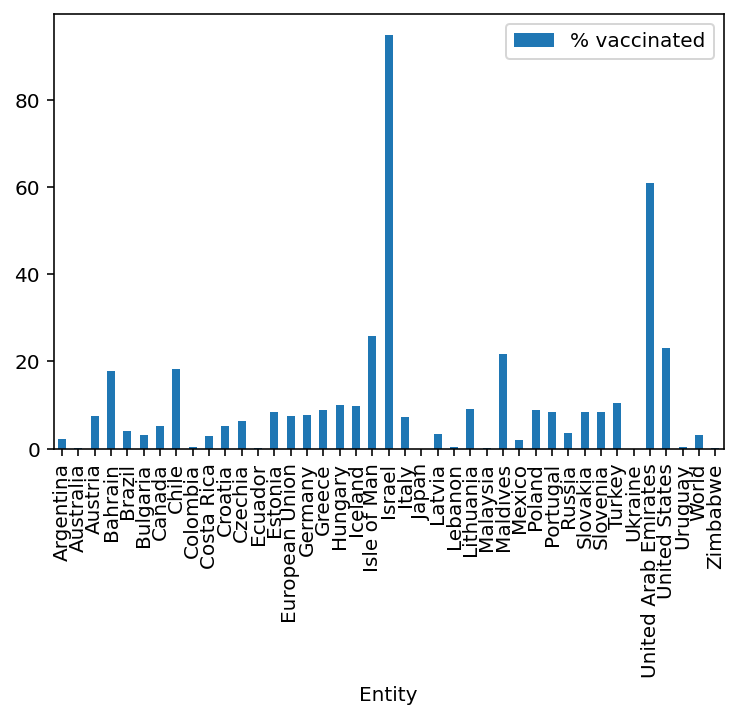

In [12]:
ax = df1.plot.bar(x='Entity',y='% vaccinated')

In [13]:
df1['Entity'].unique()

array(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Czechia', 'Ecuador', 'Estonia', 'European Union', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Isle of Man', 'Israel', 'Italy',
       'Japan', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Maldives',
       'Mexico', 'Poland', 'Portugal', 'Russia', 'Slovakia', 'Slovenia',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United States',
       'Uruguay', 'World', 'Zimbabwe'], dtype=object)

In [ ]:
# decision to exclude individual EU countries to benefits readibility
# EU distributes vaccines quite evently thus far (March 2021)
# this may change as some countries are now buying non-EU-certified Russian vaccine(Slovakia, Hungary)

In [14]:
drop_list = ['Austria','Bulgaria','Croatia','Czechia','Estonia','Germany',
             'Greece', 'Hungary','Isle of Man','Italy','Latvia','Lithuania',
             'Poland', 'Portugal','Slovakia', 'Slovenia',]

In [15]:
df1[~df1['Entity'].isin(drop_list)]

,Entity,Code,Date,% vaccinated
73,Argentina,ARG,2021-03-01,2.32
88,Australia,AUS,2021-03-01,0.13
202,Bahrain,BHR,2021-03-01,17.70
357,Brazil,BRA,2021-03-01,3.98
456,Canada,CAN,2021-03-01,5.18
535,Chile,CHL,2021-03-01,18.26
558,Colombia,COL,2021-03-01,0.29
569,Costa Rica,CRI,2021-03-01,2.94
748,Ecuador,ECU,2021-03-01,0.24
932,European Union,NaN,2021-03-01,7.60


In [16]:
df2 = df1[~df1['Entity'].isin(drop_list)]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 73 to 3195
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        25 non-null     object 
 1   Code          24 non-null     object 
 2   Date          25 non-null     object 
 3   % vaccinated  25 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1000.0+ bytes


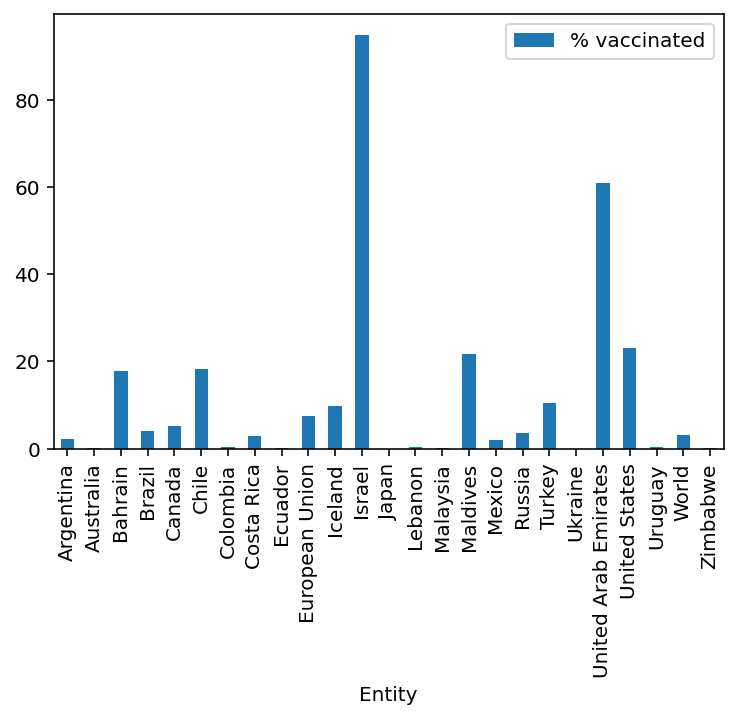

In [18]:
ax = df2.plot.bar(x='Entity',y='% vaccinated')